# Setting folder

In [1]:
%pwd

'/workspace/source'

# Import

In [2]:
import os
import time

from tqdm.notebook import tqdm

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# import albumentations as A
# import albumentations.pytorch as Ap

from torchvision import transforms
import torchvision.models as models

from utils import load_all_set

## seed value

In [3]:
IN_HEIGHT, IN_WIDTH = 224, 224

RESOURCE = "GPU"

RANDOM_SEED = 46

EPOCH = 100
BATCH_SIZE =  64
lr = 1e-3

model_path = 'trained_weight/resnet50.pth'

np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

if RESOURCE == "CPU":
    device = torch.device("cpu")
    torch.manual_seed(RANDOM_SEED)
elif RESOURCE == "GPU":
    device = torch.device("cuda")
    torch.cuda.manual_seed(RANDOM_SEED)

# Install dataset

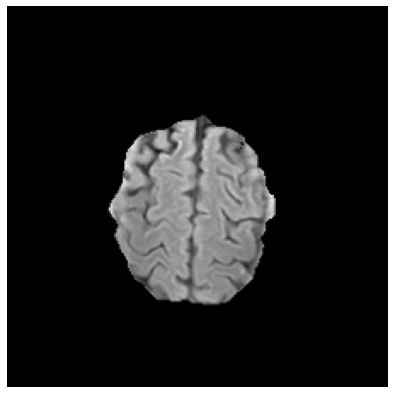

In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = load_all_set()

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(x_train[0], cmap='gray')

In [5]:
class MyDataset(Dataset):
    def __init__(self, xs, ys, transforms=None):
        self.xs = xs
        self.ys = ys
        self.transforms = transforms
        self.data_num = len(xs)

    def __len__(self):
        return self.data_num

    def __getitem__(self, idx):
        x = self.xs[idx]
        y = self.ys[idx]

        if self.transforms:
            x = self.transforms(x)
        
        return x, y

In [6]:
transforms_train = transforms.Compose([
    transforms.ToTensor(),
])

transforms_val = transforms.Compose([
    transforms.ToTensor(),
])

In [7]:
dataset_train = MyDataset(xs=x_train, ys=y_train, transforms=transforms_train)
dataset_val = MyDataset(xs=x_val, ys=y_val, transforms=transforms_val)

train_n = len(dataset_train)
val_n = len(dataset_val)

print(train_n)
print(val_n)

dataloader_train = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=BATCH_SIZE, shuffle=True)

8980
1448


# Model compile

In [8]:
model = models.resnet50(pretrained=True)
model.fc = nn.Sequential(nn.Linear(2048,1, bias=True),  nn.Sigmoid())
model = model.to(device)

criterion = nn.BCELoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=lr)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Train

  0%|          | 0/141 [00:00<?, ?it/s]

epoch:1/100 [train]loss0.138213 acc:0.9645, [val]loss:0.177641, acc:0.9435


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:2/100 [train]loss0.146336 acc:0.9498, [val]loss:0.130455, acc:0.9615


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:3/100 [train]loss0.171922 acc:0.9483, [val]loss:0.305266, acc:0.8980


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:4/100 [train]loss0.092322 acc:0.9715, [val]loss:0.175470, acc:0.9329


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:5/100 [train]loss0.146049 acc:0.9497, [val]loss:0.240405, acc:0.9136


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:6/100 [train]loss0.156799 acc:0.9493, [val]loss:0.365651, acc:0.8849


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:7/100 [train]loss0.099665 acc:0.9709, [val]loss:0.178225, acc:0.9353


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:8/100 [train]loss0.078723 acc:0.9729, [val]loss:0.213643, acc:0.9416


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:9/100 [train]loss0.086574 acc:0.9684, [val]loss:0.273626, acc:0.9209


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:10/100 [train]loss0.102775 acc:0.9649, [val]loss:0.215903, acc:0.9310


<Figure size 504x720 with 0 Axes>

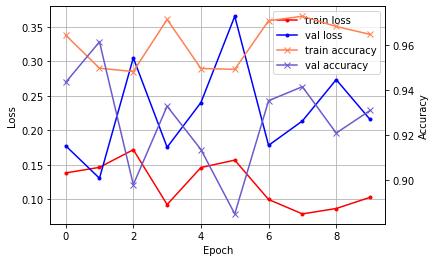

  0%|          | 0/141 [00:00<?, ?it/s]

epoch:11/100 [train]loss0.445913 acc:0.8168, [val]loss:0.542436, acc:0.7761


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:12/100 [train]loss0.067297 acc:0.9758, [val]loss:0.245583, acc:0.9296


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:13/100 [train]loss0.061093 acc:0.9779, [val]loss:0.261423, acc:0.9291


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:14/100 [train]loss0.052896 acc:0.9822, [val]loss:0.211047, acc:0.9211


  0%|          | 0/141 [00:00<?, ?it/s]

epoch:15/100 [train]loss0.032138 acc:0.9878, [val]loss:0.211047, acc:0.9353


  0%|          | 0/141 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

min_val_loss = val_n
stop_count = 0

for epoch in range(EPOCH):
    model.train()

    tr_loss = 0
    correct = 0
    total = 0

    # Training
    train_time_start = time.time()

    step = 0
    batch_accuracy = 0
    for inputs, targets in tqdm(dataloader_train):
        optimizer.zero_grad()

        n_batch = len(inputs)

        inputs = inputs.to(device)
        targets = targets.to(torch.float32)
        targets = targets.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, targets)

        loss = loss / n_batch
        loss.backward()

        optimizer.step()
        
        b_outputs = outputs.squeeze().cpu().detach().numpy().copy()
        b_targets = targets.squeeze().cpu().detach().numpy().copy()
        b_outputs = np.where(b_outputs>0.5, 1.0, 0.0)
        batch_accuracy += accuracy_score(b_targets, b_outputs)
        step += 1

    train_time_end = time.time()

    model.eval()

    # train data accuracy and loss 
    step = 0
    batch_accuracy = 0
    train_loss = 0
    with torch.no_grad():
        for train_inputs, train_targets in dataloader_train:
            
            train_inputs = train_inputs.to(device)
            train_targets = train_targets.to(torch.float32)
            train_targets = train_targets.to(device)
            
            train_outputs = model(train_inputs)

            loss = criterion(train_outputs, train_targets)

            train_loss += loss.item() / train_n

            b_outputs = train_outputs.squeeze().cpu().numpy().copy()
            b_targets = train_targets.squeeze().cpu().numpy().copy()
            b_outputs = np.where(b_outputs>0.5, 1.0, 0.0)
            batch_accuracy += accuracy_score(b_targets, b_outputs)
            step += 1

    train_accuracy = batch_accuracy / step
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    # Validation data accuracy and loss
    val_time_start = time.time()

    step = 0
    batch_accuracy = 0
    val_loss = 0
    with torch.no_grad():
        for val_inputs, val_targets in dataloader_val:
            
            val_inputs = val_inputs.to(device)
            val_targets = val_targets.to(torch.float32)
            val_targets = val_targets.to(device)
            
            val_outputs = model(val_inputs)

            loss = criterion(val_outputs, val_targets)

            val_loss += loss.item() / val_n

            b_outputs = val_outputs.squeeze().cpu().numpy().copy()
            b_targets = val_targets.squeeze().cpu().numpy().copy()
            b_outputs = np.where(b_outputs>0.5, 1.0, 0.0)
            batch_accuracy += accuracy_score(b_targets, b_outputs)
            step += 1

    val_accuracy = batch_accuracy / step
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

    val_time_end = time.time()

    if min_val_loss > val_loss:
        torch.save(model.state_dict(), model_path)

    train_time = train_time_end - train_time_start
    val_time = val_time_end - val_time_start
    total_time = train_time + val_time

    print(f"epoch:{epoch+1}/{EPOCH} [train]loss{train_loss:.6f} acc:{train_accuracy:.4f}, [val]loss:{val_loss:.6f}, acc:{val_accuracy:.4f}")

    if (epoch+1) % 10 == 0:
        plt.figure(figsize=(7,10))
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.grid()
        ax1.plot(train_losses, marker=".", markersize=6, color="red", label="train loss")
        ax1.plot(val_losses, marker=".", markersize=6, color="blue", label="val loss")
        ax2.plot(train_accuracies, marker="x", markersize=6, color="coral", label="train accuracy")
        ax2.plot(val_accuracies, marker="x", markersize=6, color="slateblue", label="val accuracy")
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc="upper right")
        ax1.set(xlabel="Epoch", ylabel="Loss")
        ax2.set(ylabel="Accuracy")
        plt.show()

    if (epoch +1)== EPOCH:
        plt.figure(figsize=(7,10))
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.grid()
        ax1.plot(train_losses, marker=".", markersize=6, color="red", label="train loss")
        ax1.plot(val_losses, marker=".", markersize=6, color="blue", label="val loss")
        ax2.plot(train_accuracies, marker="x", markersize=6, color="salmon", label="train accuracy")
        ax2.plot(val_accuracies, marker="x", markersize=6, color="slateblue", label="val accuracy")
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc="upper right")
        ax1.set(xlabel="Epoch", ylabel="Loss")
        ax2.set(ylabel="Accuracy")
        plt.show()
        plt.savefig('acc_loss.png', bbox_inches='tight')

# Test

In [ ]:
transforms_test = transforms.Compose([
    transforms.ToTensor(),
])
dataset_test = MyDataset(xs=x_test, ys=y_test, transforms=transforms_test)

test_n = len(dataset_test)

dataloader_test = DataLoader(dataset_test, batch_size=2*BATCH_SIZE)

model.load_state_dict(torch.load(model_path))
model.eval()

step = 0
batch_accuracy = 0
with torch.no_grad():
    for inputs, targets in dataloader_test:
        n_batch = len(inputs)

        inputs = inputs.to(device)
        targets = targets.to(torch.float32)
        targets = targets.to(device)
        
        outputs = model(inputs)
        
        b_outputs = outputs.squeeze().cpu().numpy().copy()
        b_targets = targets.squeeze().cpu().numpy().copy()
        b_outputs = np.where(b_outputs>0.5, 1.0, 0.0)
        batch_accuracy += accuracy_score(b_targets, b_outputs)
        step += 1

test_accuracy = batch_accuracy / step

print(f'{100*test_accuracy:.2f}%')




86.64%
